In [3]:
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import numpy as np
import os
import skimage.io
from time import  time
from sklearn import cluster ,utils

In [4]:
print('jupyter lab')

jupyter lab


In [5]:
img_dir = os.path.join(os.getcwd(), "images")
def plot_im1_im2(im1,im2,title1="original",title2="reconstruction"):
    fig = plt.figure()
    plt.gray()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(im1),ax2.imshow(im2)
    ax1.set_title(title1,size=12),ax2.set_title(title2,size=12)
    ax1.set_axis_off(),ax2.set_axis_off()
    fig.show()


In [6]:
print(img_dir)

C:\Users\chenb\jupyterLab文件\images


In [7]:
img = skimage.io.imread(img_dir+"\pepper.jpg")
width , height , channel = img_shape = tuple(img.shape)
x = np.reshape(img,(width*height,channel)) # 展平
def my_kmeans(x,n_clusters=64,n_samples=1000):
    x = x / 255.
    # n_samples不能太大，花费时间变长
    train_x = utils.shuffle(x,random_state=0,n_samples=n_samples)
    print(len(train_x))
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(train_x)
    #  可以返回 kmeans.labels_ 和 cluster_centers_
    #  分别表示聚类数据的实际标签和指定聚类的中心坐标
    x_pred = kmeans.predict(x) # 每个像素点预测的结果，属于何种标签，标签和聚类中心一一对应
    cluster_centers = kmeans.cluster_centers_ # 聚类中心坐标
    # train_y = kmeans.labels_ # 无监督学习没有标签，这是自动生成的实际标签
    # 根据标签重构图像（但是图像必须要全部的像素）
    img_re  = np.zeros((width,height,channel))
    idx = 0 # 每个像素点的索引，从0遍历置width*height所有像素点
    for i in range(width) :
        for j in range(height) :
            current_pixel_label = x_pred[idx] # 当前像素点的标签为0,1,2,...n_clusters中的1类
            current_pixel = cluster_centers[current_pixel_label] # 聚类中心label=0,1,2,...k对应第0,1,2,..k个聚类中心坐标
            img_re[i, j] = current_pixel # 以聚类中心像素值代替原本的像素
            idx += 1
            # print(idx)
    return img_re


1000
n_clusters = 128 时花费的时间为 1.0242602825164795
1000


c:\users\chenb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


n_clusters = 64 时花费的时间为 0.8188109397888184
1000


c:\users\chenb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


n_clusters = 32 时花费的时间为 0.7420411109924316
1000


c:\users\chenb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


n_clusters = 8 时花费的时间为 0.6891615390777588
1000


c:\users\chenb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


n_clusters = 4 时花费的时间为 0.6542487144470215


c:\users\chenb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


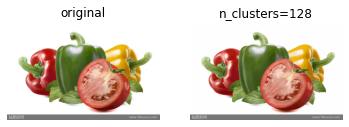

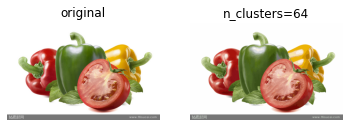

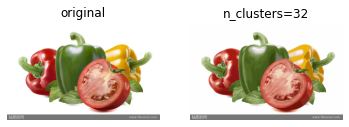

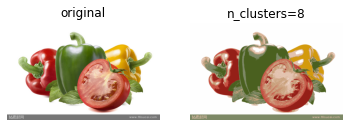

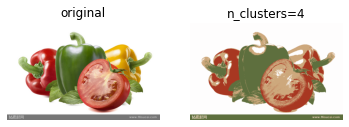

In [8]:
for n_clusters in [128,64,32,8,4] :
    t0 = time()
    img_re = my_kmeans(x,n_clusters=n_clusters)
    print(f"n_clusters = {n_clusters} 时花费的时间为 {time()-t0}")
    plot_im1_im2(img,img_re,title2="n_clusters="+str(n_clusters))

In [ ]:
for n_samples in [1000,50000,200000,400000] :
    t0 = time()
    img_re = my_kmeans(x,n_samples=n_samples)
    print(f"n_samples = {n_samples} 时花费的时间为 {time()-t0}")
    plot_im1_im2(img,img_re,title2="n_samples="+str(n_samples))

1000
n_samples = 1000 时花费的时间为 0.8297553062438965
50000


c:\users\chenb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


n_samples = 50000 时花费的时间为 6.709057331085205
200000


c:\users\chenb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


n_samples = 200000 时花费的时间为 23.760987997055054
400000


c:\users\chenb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
